# Project: Investigate a TMDb Data set

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

This data set contains information
about 10,000 movies collected from
The Movie Database (TMDb),
including user ratings and revenue.


<a id='intro'></a>
## Questions


<ul><li>Which genres are most popular from year to year?</li><li>Which year is the most productive year in movies?</li><li>Which are the top 10 highest and lowest budget movies?</li><li>What is more favorable: a long time length movie or a short one?</li></ul>


In [35]:
# Use this cell to set up import statements for all of the packages that you
#   plan to use.

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn  as sns
% matplotlib inline

<a id='wrangling'></a>
## Data Wrangling


### General Properties

In [36]:
# Before begining, I will change pandas to display large values and small values in exponential into float.
#   just to ease things up :).

pd.options.display.float_format = '{:.2f}'.format

In [37]:
# Load your data and print out a few lines. Perform operations to inspect data
#   types and look for instances of missing or possibly errant data.

df = pd.read_csv('Database_TMDb_movie_data/tmdb-movies.csv')
df.head()

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.99,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.50,2015,137999939.28,1392445892.52
1,76341,tt1392190,28.42,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.10,2015,137999939.28,348161292.49
2,262500,tt2908446,13.11,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.30,2015,101199955.47,271619025.41
3,140607,tt2488496,11.17,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,...,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.50,2015,183999919.04,1902723129.80
4,168259,tt2820852,9.34,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,Vengeance Hits Home,...,Deckard Shaw seeks revenge against Dominic Tor...,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.30,2015,174799923.09,1385748801.47


In [38]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
id                      10866 non-null int64
imdb_id                 10856 non-null object
popularity              10866 non-null float64
budget                  10866 non-null int64
revenue                 10866 non-null int64
original_title          10866 non-null object
cast                    10790 non-null object
homepage                2936 non-null object
director                10822 non-null object
tagline                 8042 non-null object
keywords                9373 non-null object
overview                10862 non-null object
runtime                 10866 non-null int64
genres                  10843 non-null object
production_companies    9836 non-null object
release_date            10866 non-null object
vote_count              10866 non-null int64
vote_average            10866 non-null float64
release_year            10866 non-null int64
budget_adj              1

In [39]:
print('This Dataframe contains {} rows and {} columns'.format(df.shape[0], df.shape[1]))

This Dataframe contains 10866 rows and 21 columns


In [40]:
df.describe()

,id,popularity,budget,revenue,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj
count,10866.00,10866.00,10866.00,10866.00,10866.00,10866.00,10866.00,10866.00,10866.00,10866.00
mean,66064.18,0.65,14625701.09,39823319.79,102.07,217.39,5.97,2001.32,17551039.82,51364363.25
std,92130.14,1.00,30913213.83,117003486.58,31.38,575.62,0.94,12.81,34306155.72,144632485.04
min,5.00,0.00,0.00,0.00,0.00,10.00,1.50,1960.00,0.00,0.00
25%,10596.25,0.21,0.00,0.00,90.00,17.00,5.40,1995.00,0.00,0.00
50%,20669.00,0.38,0.00,0.00,99.00,38.00,6.00,2006.00,0.00,0.00
75%,75610.00,0.71,15000000.00,24000000.00,111.00,145.75,6.60,2011.00,20853251.08,33697095.72
max,417859.00,32.99,425000000.00,2781505847.00,900.00,9767.00,9.20,2015.00,425000000.00,2827123750.41


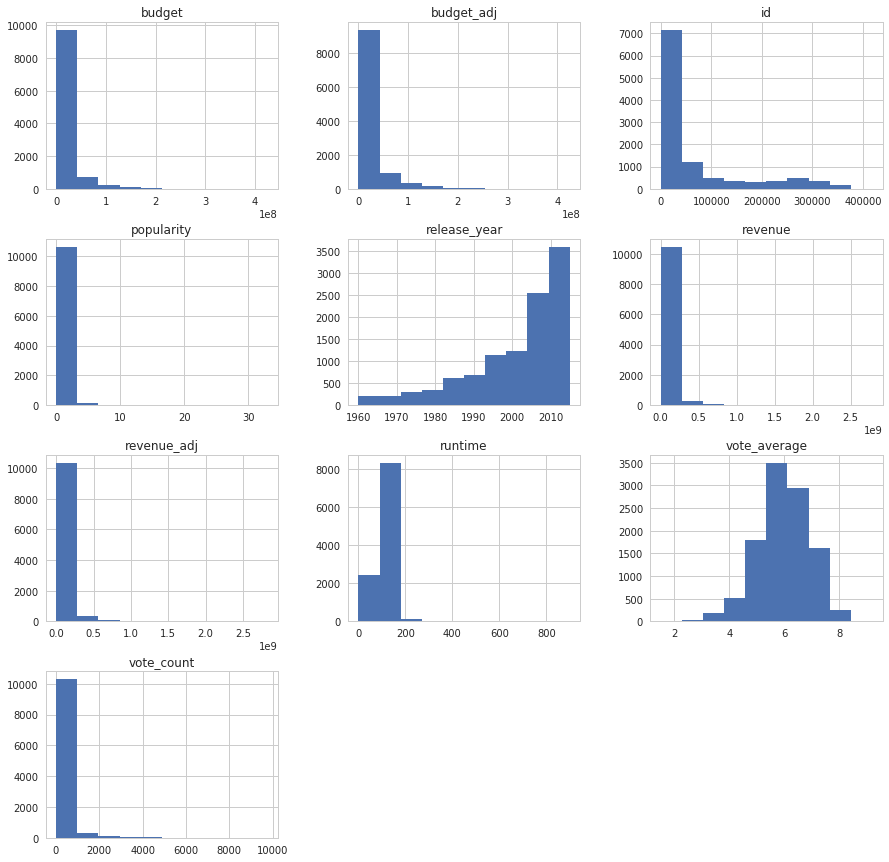

In [41]:
#  I will make histogram versions of the dataframe content to estimate how many zero values in columns 
#  and to see what is the trend of each column.

df.hist( figsize = (15, 15) );

## Discussing problems in this data set

There are many problems in this data set to start with, whether they are in values or in format. I'm going to mention every problem needed to be solved, then in **Data Cleaning** section I will solve them in **order one by one**

> ### First: Null Values and Zero Values
>>I'm going to change zero values in this data set to Null values and drop all nulls. It's clear after checking **df.describe() and df.hist()** that many rows include zero values and these columns are:
>><ul><li>revenue_adj</li><li>revenue</li><li>budget_adj</li><li>budget</li><li>runtime</li></ul>
> ### Second: Dropping non important columns (won't be used in analysis)
>>These columns are:
>><ul><li>homepage</li><li>overview</li><li>release_date</li><li>imdb_id</li><li>tagline</li></ul>
> ### Third: Rows containing this sign '|'
>> I will remove this sign to present data in rows clearly without any extras or issues in analysis. Columns that have these issue are:
>><ul><li>cast</li><li>director</li><li>genres</li><li>production_companies</li><li>keywords</li></ul>




### Data Cleaning

 

#### First: Null Values and Zero Values

In [42]:
# Changing zeros into nulls

df['revenue_adj'].replace(0, np.NAN, inplace=True)
df['revenue'].replace(0, np.NAN, inplace=True)
df['budget_adj'].replace(0, np.NAN, inplace=True)
df['budget'].replace(0, np.NAN, inplace=True)
df['runtime'].replace(0, np.NAN, inplace=True)

# Dropping all rows that contain nulls in the dataframes (including zeros that are changed into nulls)

df.dropna(axis=0, inplace=True)

#### Second: Dropping non important columns (won't be used in analysis)

In [43]:
df = df.drop( ['homepage', 'overview', 'release_date', 'imdb_id', 'tagline'], axis = 1 )

#### Third: Rows containing this sign '|'

I'm going to clean rows containing this sign by a special way. For example a column like 'cast' will be divided into a Dataframe with multiple columns (which will be joined by its original Dataframe after the orginal cast column being dropped) taking each value seperated by '|' into a seperated column in this new cast dataframe, so ,by doing this, I've cleared my way to deal with 'cast' column easily or we can say all columns that contain rows with values seperated by this sign('|').

In [44]:
# expand = true to replace the delimeter with none
# and rename the column with its name followed by underscore and its iteration

cast = (df['cast'].str.split('|', expand=True).rename(columns=lambda x: f"cast_{x+1}"))
director = (df['director'].str.split('|', expand=True).rename(columns=lambda x: f"director_{x+1}"))
genres = (df['genres'].str.split('|', expand=True).rename(columns=lambda x: f"genres_{x+1}"))
production_companies = (df['production_companies'].str.split('|', expand=True).rename(columns=lambda x: f"production_companies_{x+1}"))
keywords = (df['keywords'].str.split('|', expand=True).rename(columns=lambda x: f"keywords_{x+1}"))

In [45]:
# I will drop original columns of cast, director, genres, production_companies, and keywords.


df = df.drop(['cast', 'director', 'genres', 'production_companies', 'keywords'], axis=1)

In [46]:
# Checking my output

cast.head()

,cast_1,cast_2,cast_3,cast_4,cast_5
0,Chris Pratt,Bryce Dallas Howard,Irrfan Khan,Vincent D'Onofrio,Nick Robinson
1,Tom Hardy,Charlize Theron,Hugh Keays-Byrne,Nicholas Hoult,Josh Helman
2,Shailene Woodley,Theo James,Kate Winslet,Ansel Elgort,Miles Teller
3,Harrison Ford,Mark Hamill,Carrie Fisher,Adam Driver,Daisy Ridley
4,Vin Diesel,Paul Walker,Jason Statham,Michelle Rodriguez,Dwayne Johnson


In [47]:
director.head()

,director_1,director_2,director_3,director_4,director_5,director_6
0,Colin Trevorrow,None,None,None,None,None
1,George Miller,None,None,None,None,None
2,Robert Schwentke,None,None,None,None,None
3,J.J. Abrams,None,None,None,None,None
4,James Wan,None,None,None,None,None


In [72]:
genres.head()

,genres_1,genres_2,genres_3,genres_4,genres_5
0,Action,Adventure,Science Fiction,Thriller,None
1,Action,Adventure,Science Fiction,Thriller,None
2,Adventure,Science Fiction,Thriller,None,None
3,Action,Adventure,Science Fiction,Fantasy,None
4,Action,Crime,Thriller,None,None


In [49]:
production_companies.head()

,production_companies_1,production_companies_2,production_companies_3,production_companies_4,production_companies_5
0,Universal Studios,Amblin Entertainment,Legendary Pictures,Fuji Television Network,Dentsu
1,Village Roadshow Pictures,Kennedy Miller Productions,None,None,None
2,Summit Entertainment,Mandeville Films,Red Wagon Entertainment,NeoReel,None
3,Lucasfilm,Truenorth Productions,Bad Robot,None,None
4,Universal Pictures,Original Film,Media Rights Capital,Dentsu,One Race Films


In [50]:
keywords.head()

,keywords_1,keywords_2,keywords_3,keywords_4,keywords_5
0,monster,dna,tyrannosaurus rex,velociraptor,island
1,future,chase,post-apocalyptic,dystopia,australia
2,based on novel,revolution,dystopia,sequel,dystopic future
3,android,spaceship,jedi,space opera,3d
4,car race,speed,revenge,suspense,car


In [51]:
# Output is correct like what I expected!
#   , so I will join the modified columns

df = df.join([cast, director, genres, production_companies, keywords])

In [52]:
df.duplicated().sum()

0

No duplicates therefore it's already cleaned from duplicates

Now after cleaning, I will check how many rows and columns rest in the Dataset

In [53]:
print('This Dataframe contains {} rows and {} columns'.format(df.shape[0], df.shape[1]))

This Dataframe contains 1287 rows and 37 columns


In [54]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1287 entries, 0 to 10760
Data columns (total 37 columns):
id                        1287 non-null int64
popularity                1287 non-null float64
budget                    1287 non-null float64
revenue                   1287 non-null float64
original_title            1287 non-null object
runtime                   1287 non-null float64
vote_count                1287 non-null int64
vote_average              1287 non-null float64
release_year              1287 non-null int64
budget_adj                1287 non-null float64
revenue_adj               1287 non-null float64
cast_1                    1287 non-null object
cast_2                    1285 non-null object
cast_3                    1285 non-null object
cast_4                    1283 non-null object
cast_5                    1278 non-null object
director_1                1287 non-null object
director_2                110 non-null object
director_3                11 non-null objec

Perfect!! Now I'm ready to explore this Dataset after the huge reduction from the cleaning I did in the previous steps.

<a id='eda'></a>
## Exploratory Data Analysis



### Research Question 1 (Which genres are most popular from year to year?)

In [55]:
# Selecting only genres and joining release_year with them to freely analyze them carefuly

df_gen = df.loc[:, 'genres_1': 'genres_5' ]
df_gen_year = df_gen.join(df['release_year'])

In [56]:
# Creating an array containing all years in the dataframe 

years = df_gen_year['release_year'].unique()
years.sort()
years

array([1961, 1962, 1963, 1964, 1965, 1967, 1969, 1971, 1972, 1973, 1974,
       1975, 1977, 1978, 1979, 1980, 1981, 1982, 1983, 1984, 1985, 1986,
       1987, 1988, 1989, 1990, 1991, 1992, 1993, 1994, 1995, 1996, 1997,
       1998, 1999, 2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008,
       2009, 2010, 2011, 2012, 2013, 2014, 2015])

In [57]:
# Creating a tuple that will store the output genres in it

popular_gen = []

In [59]:
# Loop on years to know which genres from year to year are the most popular.

for year in years:
    
    # Getting the specific year we want from dataframe
    
    df_this_year = df_gen_year[df_gen_year['release_year'] == year] 
    
    # Dropping release_year column as we know we already selected specific year from the dataframe 
    #        , and to use stack to count only genres
    
    genres_of_this_year = df_this_year.drop(['release_year'], axis = 1)
    
    # counts from genres_1 to genres_5 in one year, then store the most frequent one in most_popular_genre_by_production
    
    most_popular_genre_by_production = genres_of_this_year.stack().value_counts().idxmax() 
    
    # Getting original dataframe to get attribute vote_average from it
    
    df_tmp = df[df['release_year'] == year]
    
    # Getting the mean of vote_average and store the index of maximum value
    
    most_popular_gen_by_voting = df_tmp.groupby(['genres_1'])['vote_average'].mean().idxmax()
    
    #Comparing between people's vote on most popular genres and most popular genres by production
    
    if most_popular_genre_by_production == most_popular_gen_by_voting:
        flag = 'Same'
    else:
        flag = 'Different'

    # fill tuple with output
    
    popular_gen.append((year, most_popular_genre_by_production, most_popular_gen_by_voting, flag))

In [60]:
# creating dataframe of the output of the question

df_most_popular_gen_this_year = pd.DataFrame( popular_gen, columns = ['release_year', 'most_popular_genre_by_production', 'most_popular_genere_by_voting', 'results'] ).reset_index().drop('index', axis = 1)
df_most_popular_gen_this_year

,release_year,most_popular_genre_by_production,most_popular_genere_by_voting,results
0,1961,Family,Comedy,Different
1,1962,Thriller,Adventure,Different
2,1963,Thriller,Action,Different
3,1964,Action,Adventure,Different
4,1965,Thriller,Adventure,Different
5,1967,Thriller,Action,Different
6,1969,Thriller,Adventure,Different
7,1971,Thriller,Action,Different
8,1972,Drama,Drama,Same
9,1973,Thriller,Drama,Different


### Research Question 2  (Which year is the most productive year in movies?)

In [61]:
# Counting production of movies each year.

most_productive_year_in_movies = df.groupby('release_year').count()['id']
most_productive_year_in_movies

release_year
1961      1
1962      1
1963      1
1964      2
1965      1
1967      1
1969      1
1971      4
1972      1
1973      2
1974      1
1975      3
1977      2
1978      2
1979      4
1980      2
1981      6
1982      3
1983      5
1984      4
1985      2
1986      1
1987      4
1988      2
1989      4
1990      4
1991      2
1992      5
1993      7
1994      5
1995      8
1996     13
1997      8
1998     11
1999     22
2000     14
2001     18
2002     24
2003     30
2004     43
2005     51
2006     68
2007     92
2008     82
2009    116
2010    132
2011    156
2012     88
2013     65
2014     70
2015     93
Name: id, dtype: int64

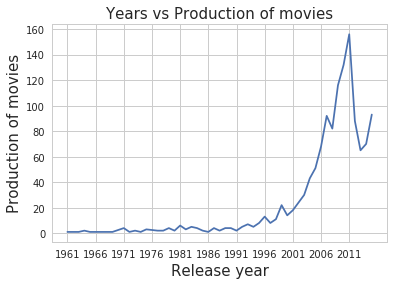

In [62]:
# Plotting the output

most_productive_year_in_movies.plot(xticks = np.arange(1961,2015,5), fontsize = 10)

sns.set(rc={'figure.figsize' : (10,5)})

plt.title("Years vs Production of movies",fontsize = 15)

plt.xlabel('Release year',fontsize = 15)

plt.ylabel('Production of movies',fontsize = 15)

sns.set_style("whitegrid")

### Research Question 3  (Which are the top 10 highest and lowest budget movies?)

In [63]:
# Sorting budgets descindingly and joining them with their movie titles to get top 10 easily

budgets = pd.DataFrame(df['budget'].sort_values(ascending = False))
budgets['original_title'] = df['original_title']

#changing budgets' titles from objects to string and store them as a list 

titles = list(map(str,(budgets['original_title'])))

# assigning x and y lists to label x and y axes 

x = list(titles[:10])
y = list(budgets['budget'][:10])

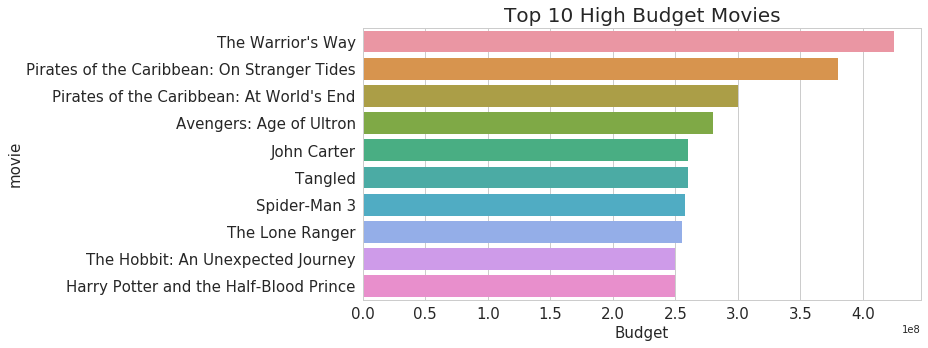

In [64]:
# Plotting the output

def plot (x , y) :
    plot = sns.barplot(x = y, y = x)
    sns.set(rc={'figure.figsize' : (15,10)})
    plot.set_title("Top 10 High Budget Movies", fontsize = 20)
    plot.set_xlabel("Budget", fontsize = 15)
    plot.set_ylabel("movie", fontsize = 15)
    plt.yticks(fontsize = 15)
    plt.xticks(fontsize = 15)
    sns.set_style("whitegrid")

plot(x,y)

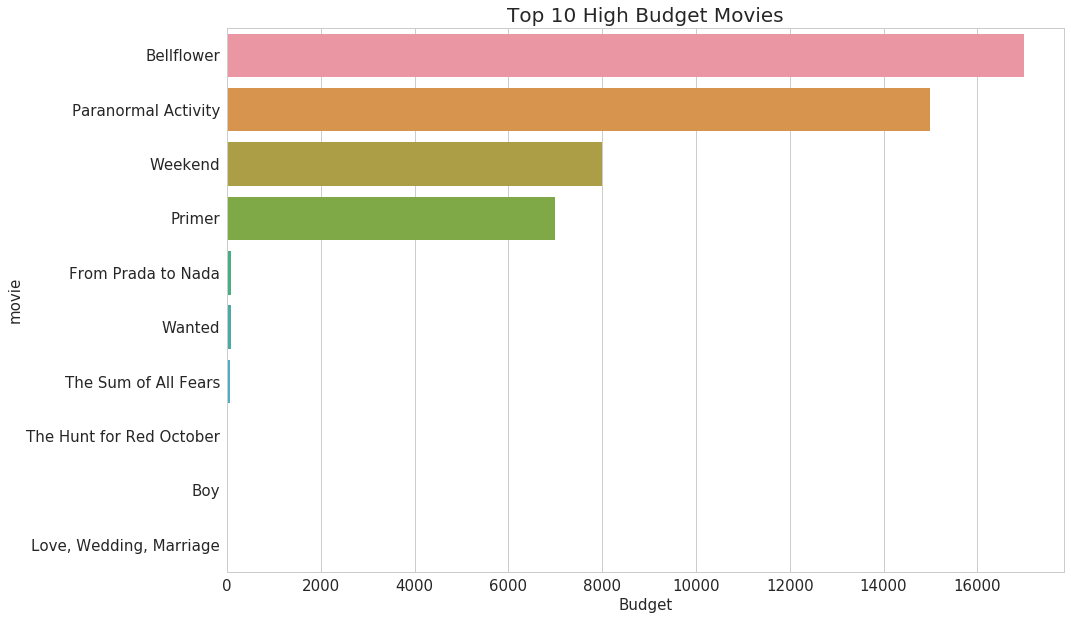

In [65]:
# Budget for the lowest 10 as well

# assigning x and y lists to label x and y axes 

x = list(titles[-10:])
y = list(budgets['budget'][-10:])

# Plotting the output and using function manually created called plot()

plot(x,y)

### Research Question 4  (What is more favorable: a long time length movie or a short one?)

In [66]:
# Getting output from original dataframe by grouping runtime with the popularity and getting the average of popularity

output = df.groupby('runtime')['popularity'].mean()
output.tail(50)

runtime
127.00    2.05
128.00    1.51
129.00    1.24
130.00    2.41
131.00    2.12
132.00    2.25
133.00    1.49
134.00    1.29
135.00    1.90
136.00    5.19
137.00    3.06
138.00    2.60
139.00    3.28
140.00    2.28
141.00    3.09
142.00    2.90
143.00    6.02
144.00    3.02
145.00    2.01
146.00    2.61
147.00    1.71
148.00    4.98
149.00    2.44
150.00    1.40
151.00    3.51
152.00    5.71
153.00    3.87
154.00    0.76
156.00    9.11
157.00    2.76
158.00    2.88
159.00    1.33
160.00    0.65
161.00    4.31
162.00    5.60
165.00    5.84
166.00    2.54
167.00    2.94
169.00   11.38
170.00    0.82
172.00    2.48
175.00    5.74
178.00    4.90
179.00    8.10
180.00    4.88
188.00    0.68
189.00    2.72
194.00    4.36
195.00    2.38
201.00    7.12
Name: popularity, dtype: float64

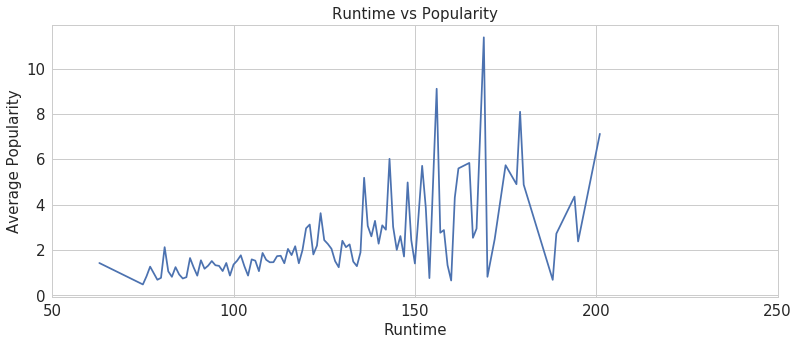

In [67]:
# Plotting the output

output.plot(figsize = (13,5),xticks=np.arange(50,300,50))

# Adjusting the figure and its athetics

plt.xticks(fontsize = 15)
plt.yticks(fontsize = 15)
plt.title("Runtime vs Popularity",fontsize = 15)
plt.xlabel('Runtime',fontsize = 15)
plt.ylabel('Average Popularity',fontsize = 15)
sns.set(rc={'figure.figsize':(15,10)})
sns.set_style("whitegrid")

<a id='conclusions'></a>
## Conclusions

### by the order of questions:
<ul>
<li>From what we can see in the first question's output, people opinions are biased, because when people tend to vote for the movie they love, it doesn't mean that genres of this movies are the most popular, that's why in the results I had many different values at results' column, which makes a realistic sense.</li>
<li>We can deduce from second question's output that 2011 was the year most productive with 156 movies produced followed by 2010 with 132 movies produced and followed by 2009 by 116 movies produced, however this might be untrue as we will discuss in limitations.</li>
<li>We can deduce from third question's output that the movie that has highest budget is The Warrior's way with 425000000 dollars and the lowest is Love, Wedding, Marrige with 1 dollar.</li>
<li>We can deduce from last (Fourth) question's output that people like movies from 143 mins to 201 mins any shorter than this range will be less favored for people, and due to limitations that will be discussed in next section I can't know whether people like to watch more than 201 mins movie or not. However we can know that more than 143 mins is favored to watch which is considered to be a long movie, so people enjoy watching long ones.</li>
</ul> 
    

### Limitations

I had only 2 limitations in this project. First the na values, some of them can be placed by 0 or the mean but others cannot so dropping all will be the best solution I see in this case as to not replace original data by wrong inputs. I wished that author of the data set gave me just a hint from where to get the missing values so that I can deal with them not just ignoring and dropping. Second the zero budgets, it seems too wrong or misplaced to have budgets' of movies with 0, it's impossible to have something like that, so it is all dropped too to avoid failing to get real results from this data set, and also like the first problem I wished they were never there and the author of this data set would justify why a budget would have to be 0, just to skip and don't drop many values there. Due to these limitations, in question's 2 answer it was 2011 the year most productive in movies but still because I dropped too many na (missing values) and zero values, any year after 2011 could be greater in production than 2011 itself or any year before too. Same case in question 4, I dropped many rows of na and zero values so I don't know whether people like films more than 201 mins or not.

### About additional research
Lastly there are many additional research questions that can be included and explored from its attributes like production companies, cast and directors. Each attribute mentioned can have many questions on that can be asked additionaly like what is the best production company, who is the most productive director, who is the most popular actor from cast, and so on.

#### Changing notebook from (.ipynb) to (.html)

In [71]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'Investigate_a_Dataset.ipynb'])

0